##                                   What is a Neural Network?
Neural Networks as a mathematical function that maps a given input to a desired output


##                              Components of a Neural Network
1.Input Layer 
2.Hidden Layers
3.Output Layers
4.Weights and biases
5.An Activation Function

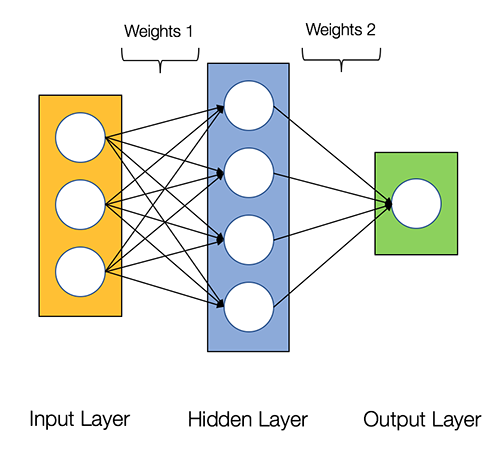

In [2]:
# Importing some useful Libraries
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s


# Defining a dataset
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y



In [3]:
# Loading various test cases
def layer_sizes_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(5, 3)
    Y_assess = np.random.randn(2, 3)
    return X_assess, Y_assess

def initialize_parameters_test_case():
    n_x, n_h, n_y = 2, 4, 1
    return n_x, n_h, n_y


def forward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    b1 = np.random.randn(4,1)
    b2 = np.array([[ -1.3]])

    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': b1,
     'b2': b2}

    return X_assess, parameters

def compute_cost_test_case():
    np.random.seed(1)
    Y_assess = (np.random.randn(1, 3) > 0)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))

    return a2, Y_assess, parameters

def backward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = (np.random.randn(1, 3) > 0)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
         [-0.05225116,  0.02725659, -0.02646251],
         [-0.02009721,  0.0036869 ,  0.02883756],
         [ 0.02152675, -0.01385234,  0.02599885]]),
  'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
  'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
         [-0.05229879,  0.02726335, -0.02646869],
         [-0.02009991,  0.00368692,  0.02884556],
         [ 0.02153007, -0.01385322,  0.02600471]]),
  'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}
    return parameters, cache, X_assess, Y_assess

def update_parameters_test_case():
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
 'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
 'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
 'b2': np.array([[  9.14954378e-05]])}

    grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
        [ 0.00082222, -0.00700776],
        [-0.00031831,  0.0028636 ],
        [-0.00092857,  0.00809933]]),
 'dW2': np.array([[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03,
          -2.55715317e-03]]),
 'db1': np.array([[  1.05570087e-07],
        [ -3.81814487e-06],
        [ -1.90155145e-07],
        [  5.46467802e-07]]),
 'db2': np.array([[ -1.08923140e-05]])}
    return parameters, grads

def nn_model_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = (np.random.randn(1, 3) > 0)
    return X_assess, Y_assess

def predict_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
     'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
     'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
     'b2': np.array([[  9.14954378e-05]])}
    return parameters, X_assess

In [4]:
X, Y = load_planar_dataset() # Loaded the dataset

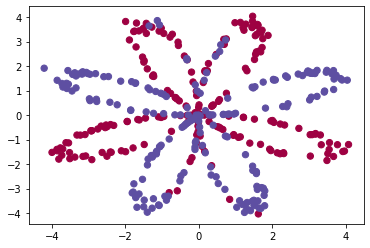

In [5]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [6]:
shape_x = X.shape
shape_y = Y.shape
m = X.shape[1]
print("Shape of X: "+ str(shape_x))
print("Shape of Y:" + str(shape_y))
print("sample case: "+ str(m))

Shape of X: (2, 400)
Shape of Y:(1, 400)
sample case: 400


# Layer Sizes:
For input layer the layer shape is given as : (n_x,m)
where m is number of sample cases 
and n_x is the input layer size
For output layer the layer shape is given as : (n_y,m)


In [10]:
def layer_sizes(X,Y):
    n_x = X.shape[0] # Input layer Size
    n_y = Y.shape[0] # Output layer Size
    n_h = 4 # Size of hidden layer (assumed this to be 4)
    return n_x,n_h,n_y

In [12]:
t_X, t_Y = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(t_X, t_Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


## Initializing Parameters:

In order to start a neural network we need to give it some it some parameters the parameters are W1,b1,W2,b2
we can give W1 and W2 some random number but not zero so we will multiply 0.01 to it

Also the shape of Wi is given as (no of neurons in that  layer, no of neurons in the previous layer)
 and that of b is given as (no of neurons in that layer, 1)

In [15]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)*0.01  # first weight 
    b1 = np.zeros((n_h,1)) # first bias
    W2 = np.random.randn(n_y, n_h)*0.01  # second weight
    b2 = np.zeros((n_y,1)) # second bias
    parameters={
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return parameters

In [16]:
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00845206 -0.00671246]
 [-0.00012665 -0.0111731 ]
 [ 0.00234416  0.01659802]
 [ 0.00742044 -0.00191836]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.00887629 -0.00747158  0.01692455  0.00050808]]
b2 = [[0.]]


# Forward Propagation:

As the name suggests, the input data is fed in the forward direction through the network. Each hidden layer accepts the input data, processes it as per the activation function and passes to the successive layer.

So giving input of A0 will give us A1 and so on 

Here is a diagram to show this:

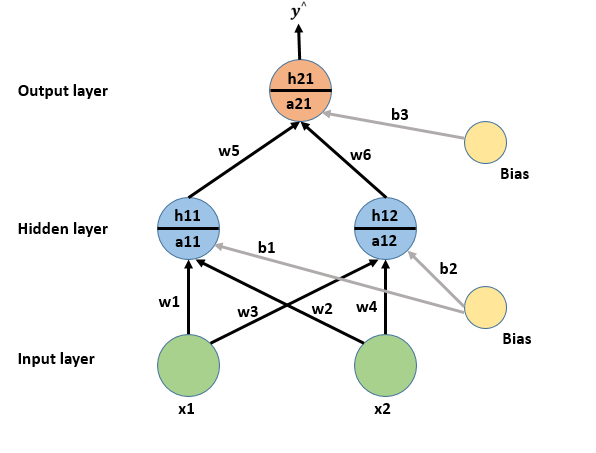

In [19]:
t_X, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(t_X, parameters)
print("A2 = "+ str(A2))

A2 = [[0.21292656 0.21274673 0.21295976]]


## Role of Cost Function :

The cost function of a neural network will be the sum of errors in each layer. This is done by finding the error at each layer first and then summing the individual error to get the total error. 

#### Formula:

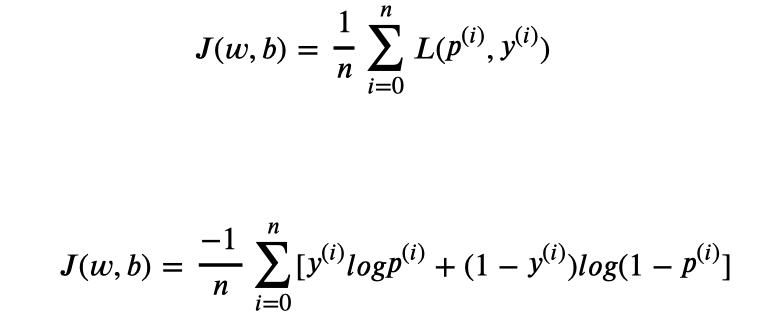

In [27]:
def compute_cost(A2,Y):
    m =Y.shape[1]
    logpart = -(np.multiply(Y,np.log((A2))) + np.multiply((1-Y),np.log(1-A2)))
    cost = (np.sum(logpart))/m
    cost = float(np.squeeze(cost))
    return cost

In [28]:
A2, t_Y,parameters = compute_cost_test_case()
cost = compute_cost(A2, t_Y)
print("cost = " + str(compute_cost(A2, t_Y)))

cost = 0.6930587610394646


## BackPropagation:

Backpropagation is the essence of neural network training. It is the method of fine-tuning the weights of a neural network based on the error rate obtained in the previous epoch (i.e., iteration). Proper tuning of the weights allows you to reduce error rates and make the model reliable by increasing its generalization.



In [32]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    # loading my parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # retriving data form cache 
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    grads= {
        "dW1":dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    return grads

In [33]:
parameters, cache, t_X, t_Y = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, t_X, t_Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


## Parameters Update 

Vanilla Update: It’s just a simple gradient descent algorithm. The simplest form of update is to change the parameters along the negative gradient direction.

x = x - (dx)*learning_rate

Learning rate should be small in order  to avoid drastic changes 

In [34]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [35]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


# Combining everything into a single nm_model function

In [55]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    n_X, n_h, n_Y = layer_sizes(X, Y)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0,num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        if print_cost or i % 1000 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [56]:
t_X, parameters = forward_propagation_test_case()
A2, t_Y,parameters = compute_cost_test_case()
nn_model(t_X, t_Y,4)

Cost after iteration 0: 0.693016
Cost after iteration 1000: 0.000225
Cost after iteration 2000: 0.000110
Cost after iteration 3000: 0.000073
Cost after iteration 4000: 0.000054
Cost after iteration 5000: 0.000043
Cost after iteration 6000: 0.000036
Cost after iteration 7000: 0.000031
Cost after iteration 8000: 0.000027
Cost after iteration 9000: 0.000024


{'W1': array([[-1.8203242 , -0.07803195],
        [-1.76102883, -0.07494464],
        [-1.51836047, -0.06220182],
        [ 1.46374374,  0.05994304]]),
 'b1': array([[ 0.6330165 ],
        [ 0.60379139],
        [ 0.48143695],
        [-0.45192127]]),
 'W2': array([[-3.43667955, -3.21872804, -2.44388471,  2.29123887]]),
 'b2': array([[-0.72532584]])}

# Predictions:

Neural networks work better at predictive analytics because of the hidden layers. Linear regression models use only input and output nodes to make predictions. The neural network also uses the hidden layer to make predictions more accurate. 

So we will be predicting on the basis of activation :

prediction = 1 if (activation > 0.5)
predction = 0 otherwise

In [62]:
def predict(parameters,X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [63]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693238
Cost after iteration 1000: 0.282150
Cost after iteration 2000: 0.269523
Cost after iteration 3000: 0.262101
Cost after iteration 4000: 0.238431
Cost after iteration 5000: 0.225731
Cost after iteration 6000: 0.221483
Cost after iteration 7000: 0.218811
Cost after iteration 8000: 0.216808
Cost after iteration 9000: 0.215196


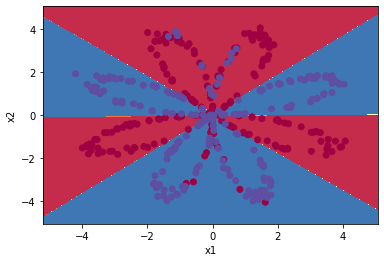

In [69]:
parameters = nn_model(X, Y, n_h = 10, num_iterations = 10000, print_cost=False)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)